### Slow ramp + Quick ramp 04. 21


In [303]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import cv2
framerate = 29.18
from scipy import signal
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
%cd "D:\Interfacial Waves resonance videos 0419"
%cd interfaceResponse/

D:\Interfacial Waves resonance videos 0419
D:\Interfacial Waves resonance videos 0419\interfaceResponse


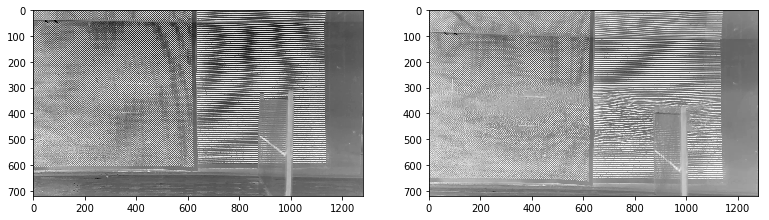

In [34]:
import numpy as np
import matplotlib.pyplot as plt

water = cv2.flip(cv2.imread("reference/frame200.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("rampSlow/frame4340.jpg", cv2.IMREAD_GRAYSCALE), -1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))

cv2.equalizeHist(water)
cv2.equalizeHist(img)
ax1.imshow(water, cmap='Greys')
ax2.imshow(img, cmap='Greys')
plt.show()



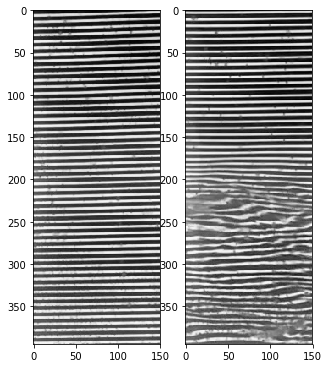

In [3]:
imgcut = img[120:515, 650:800]
refcut = water[100:495, 650:800]
f, (ax1, ax2) = plt.subplots(1,2, figsize=(5,13))
ax1.imshow(refcut, cmap='Greys')
ax2.imshow(imgcut, cmap='Greys')
refref = refcut[:, 75]
imgref = imgcut[:, 75]


## Time dependent FT of the intensity at rest.

Choosing maximal frequency component

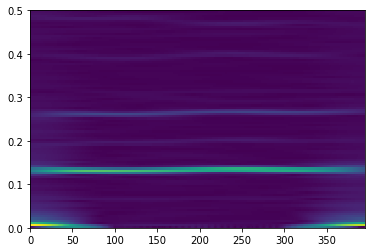

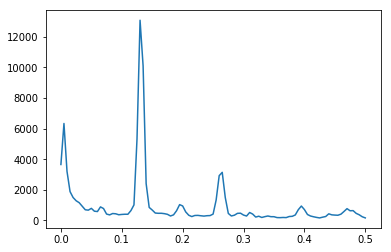

In [4]:
f, t, Zxx = signal.stft(refref, 1, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))
plt.show()
plt.plot(f, np.sum(np.abs(Zxx), axis = 1))
maxplace = np.argmax( np.abs(Zxx)[:,100])

reference = Zxx[maxplace]

In [ ]:
f2, t2, Zxx2 = signal.stft(imgref, 1, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx2))
plt.show()

#plt.plot(f, np.sum(np.abs(Zxx), axis = 1))
#maxplace = np.argmax( np.abs(Z#xx)[:,100])
#plt.show()
#plt.plot(t, np.abs(Zxx)[maxplace])

In [ ]:
selectedFreq = np.abs(Zxx2[maxplace])
relmins = (np.diff(np.sign(np.diff(selectedFreq))) > 0).nonzero()[0] + 1 

In [ ]:
plt.plot(np.abs((Zxx[maxplace])) - np.abs(selectedFreq))

In [10]:
def locateInterface(image, maxpl, col):
    f, t, Zxx = signal.stft(image[:,col], 1, nperseg=200,noverlap=199, detrend='constant')
    selectedFreq = np.abs(Zxx[maxpl])
    difference = np.abs(np.abs(Zxx[maxplace]) - np.abs(reference))
    return [np.argmax(difference), np.max(difference)] ## 
    #relMins = (np.diff(np.sign(np.diff(selectedFreq))) > 0).nonzero()[0] + 1 
    #if len(relMins)>0:
    #    minimalMinimum = np.argmin(selectedFreq[relMins])
    #    return relMins[minimalMinimum]
    #else:
    #    return np.argmin(selectedFreq)

In [142]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

def printMaxAmpl(img, ref, col, loc):
    #img = img[120:515, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    #cv2.equalizeHist(img)
    #return locateInterface(img, maxplace, col)
    
    img = img[120:515, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    cv2.equalizeHist(ref)
    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.4)
    peaks, _ = find_peaks(normalize(255.-refref), height=0.9)

    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff((peaksimgcut))))
    place = peaksimg[1:][maxplace]
    width = np.max(np.abs(np.diff((peaksimgcut))))
    return [place, width]

## Misc. functions

In [93]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 2.5*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 2.5*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)>2.5*std
    return filtered

def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev

In [143]:
import os
def measureInterface(src):
    ls = os.listdir(src) # list
    numberOfFiles = len(ls)
    ref = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/reference/frame200.jpg" )
    refc = ref[100:495, 650:800]

    ampls = []
    for i in range(numberOfFiles):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, refc,75, [650, 800]))
    return np.array(ampls)


## Moving averaged interface positions

+ moving average in a time window of 20 sec

In [95]:
rampQuick = measureInterface("quickRamp")

In [23]:
rampSlow = measureInterface("rampSlow")

In [40]:
np.savetxt("RAMPSLOW.dat", rampSlow)

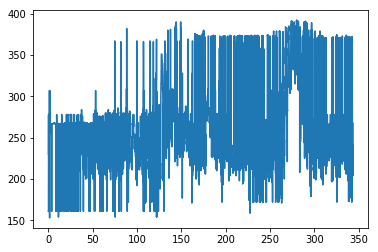

In [110]:
plt.plot(np.arange(0., len(rampSlow), 1)/29.18, filterUntilSmooth(rampSlow[:,0]))


## Density profile


[1.02187791 1.01975377 1.0135278  1.00946878 1.00234744 0.99946751]


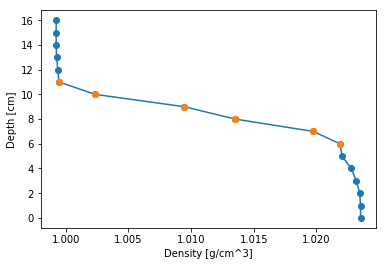

In [288]:
d = [51.7, 51.7, 51.6, 51.1, 50.4, 49.1, 48.8, 45.0, 33.4, 25.3, 9.14, 1.2, 0.9, 0.6, 0.5, 0.5, 0.5]
def cond_dens(x):
    return x**4*0.0000000000922584+x**3*(-0.0000000294733)+x**2*0.00000419348+x*0.000322098+0.999075
den = np.array(d)
plt.plot(cond_dens(den), np.arange(0, 17, 1), 'o-')
plt.plot(cond_dens(den)[6:12], np.arange(6, 12, 1), 'o')
plt.xlabel('Density [g/cm^3]')
plt.ylabel('Depth [cm]')
print(cond_dens(den)[6:12])

In [297]:
drho = (cond_dens(den)[6]-cond_dens(den)[12])*1000
rho1 = cond_dens(den)[12]*1000
print(drho)
def ResonanceFrequency(d, drho, rho1):
    g = 9.81
    h1 = 0.08
    h2 = 0.08
    gdperPi = g*d/np.pi 
    rho2 = rho1 + drho
    denom = rho1/np.tanh(np.pi*h1/d) + rho2/np.tanh(np.pi*h2/d)
    rhs = np.sqrt(gdperPi*drho/denom)
    return rhs/(2*d)
TheorResonance = ResonanceFrequency(0.255, drho, rho1)

22.509642863211333


# Slow ramp

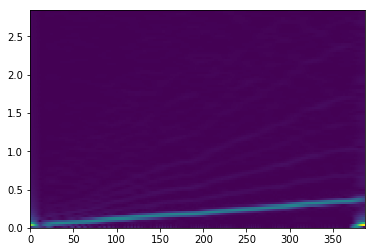

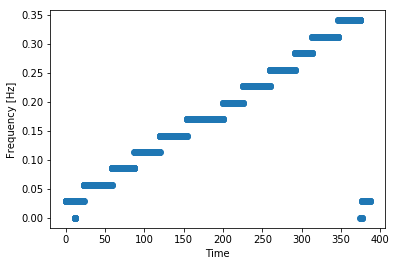

In [220]:
driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/driving/slowRamp', skiprows=2)
surface = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/slowRamp', skiprows=2)
fr = 1/(driving[1,0]-driving[0,0]) ##framerate
from scipy import signal

f, t, Zxx = signal.stft(driving[:,1], fr, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))
plt.show()
plt.plot(t, f[np.argmax(np.abs(Zxx), axis=0)], 'o')
frequencies = f[np.argmax(np.abs(Zxx), axis=0)]
plt.xlabel('Time')
plt.ylabel('Frequency [Hz]')

plt.show()


In [114]:
times_cut = t[np.logical_and(t<360, t>10)]
frequencies_cut = frequencies[np.logical_and(t<360, t>10)]

In [116]:
from scipy.optimize import curve_fit
def lin(x, a,b):
    return x*a+b

popt, pcov = curve_fit(lin, times_cut, frequencies_cut)

Text(0,0.5,'Frequency [Hz]')

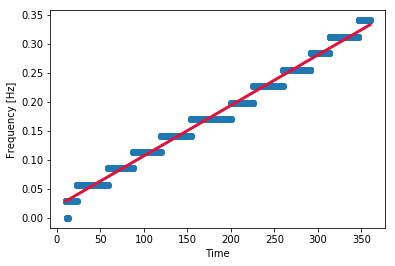

In [121]:
plt.plot(times_cut, frequencies_cut, 'o')
plt.plot(times_cut, lin(times_cut, *popt), '-', linewidth = 3., c='Crimson')
plt.xlabel('Time')
plt.ylabel('Frequency [Hz]')

$$F(t)= (0.0200 \pm 0.0004) +  (0.000869 \pm 0.000002 )\cdot t$$

In [255]:
print(popt)
print(np.diag(np.sqrt(pcov)))

[0.00086984 0.02002059]
[2.14327468e-06 4.51712632e-04]


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Moving average of 20 seconds:

In [228]:
N = int(20*29.18)
movingAvgIF = np.convolve(rampSlow[:,0], np.ones((N,))/N, mode='same')
movingAvgIFw = np.convolve(rampSlow[:,1], np.ones((N,))/N, mode='same')
movingAvgsurface = np.convolve(rightside, np.ones((N,))/N, mode='same')

surfaceTracker = surface[np.logical_and(surface[:,0]<320, surface[:,0]>20)]
movingAvgsurfaceTracker = np.convolve(surfaceTracker[:,1], np.ones((100,))/100, mode='same')


In [229]:
tFine = np.arange(0., len(rampSlow), 1)/29.18
tFineFiltered = tFine[np.logical_and(tFine<320, tFine>20)]

movingAvgIF_filt = movingAvgIF[np.logical_and(tFine<320, tFine>20)]
movingAvgIFw_filt = movingAvgIFw[np.logical_and(tFine<320, tFine>20)]
movingAvgsurface_filt = movingAvgsurface[np.logical_and(tFine<320, tFine>20)]


#plt.plot(tFineFiltered, movingAvgIF_filt, 'o', markersize=1.)


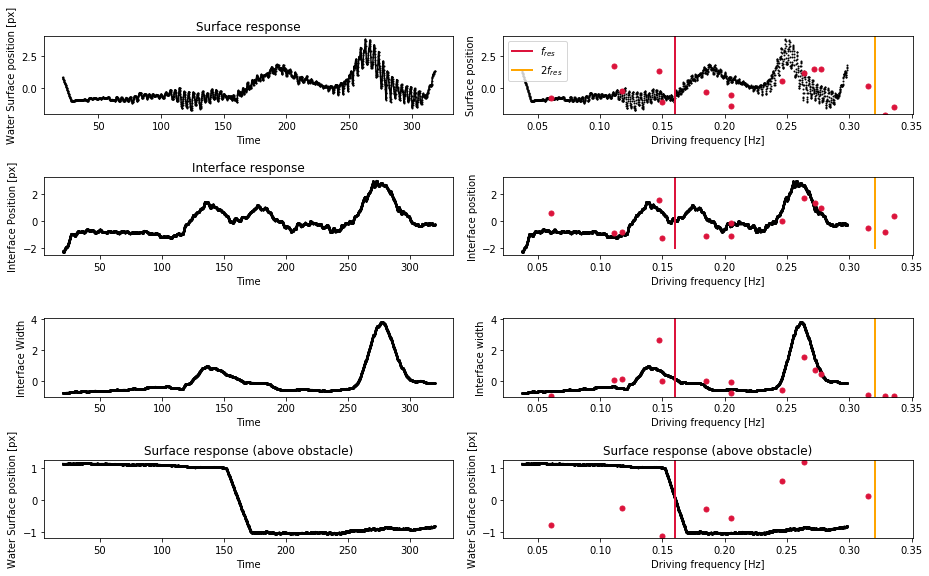

In [301]:
f, axes = plt.subplots(4, 2)

axes[0][0].plot(surfaceTracker[:,0][10:-10], normalize(movingAvgsurfaceTracker)[10:-10], '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(tFineFiltered, normalize(movingAvgIF_filt),'-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(lin(surfaceTracker[:,0], *popt),  normalize(movingAvgsurfaceTracker), 'o', markersize=1, c='black')
#axes[0][1].plot(frequencies, normalize(surfaceRes[:,1]), 'o', markersize=5, c='Crimson')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')
axes[0][1].plot(frozenFreqs, normalize(surfaceResonance), 'o', markersize=5, c='Crimson')
axes[0][1].set_ylim(axes[0][0].get_ylim())

axes[0][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[0][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')
axes[0][1].legend(loc='upper left')

axes[1][1].plot(lin(tFineFiltered, *popt),  normalize(movingAvgIF_filt), 'o', markersize=1, c='black')
axes[1][1].plot(frozenFreqs, normalize(Resonance[:,0]), 'o', markersize=5, c='Crimson')
axes[1][1].set_ylim(axes[1][0].get_ylim())
axes[1][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[1][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')

axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')


axes[2][0].plot(tFineFiltered, normalize(movingAvgIFw_filt),'-o', markersize=1, c='black')
axes[2][0].set_ylabel('Interface Width')
axes[2][0].set_xlabel('Time')

axes[2][1].plot(lin(tFineFiltered, *popt),  normalize(movingAvgIFw_filt), 'o', markersize=1, c='black')
axes[2][1].plot(frozenFreqs, normalize(Resonance[:,1]), 'o', markersize=5, c='Crimson')

axes[2][1].set_ylim(axes[2][0].get_ylim())
axes[2][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[2][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')


axes[2][1].set_ylabel('Interface width')
axes[2][1].set_xlabel('Driving frequency [Hz]')

axes[3][0].plot(tFineFiltered, normalize(movingAvgsurface_filt), '-o', markersize=1, c='black')
axes[3][0].set_xlabel('Time')
axes[3][0].set_ylabel('Water Surface position [px]')
axes[3][0].set_title('Surface response (above obstacle)')

axes[3][1].plot(lin(tFineFiltered, *popt), normalize(movingAvgsurface_filt), '-o', markersize=1, c='black')
axes[3][1].plot(frozenFreqs, normalize(surfaceResonance), 'o', markersize=5, c='Crimson')


axes[3][1].set_ylim(axes[3][0].get_ylim())
axes[3][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[3][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')

axes[3][1].set_xlabel('Driving frequency [Hz]')
axes[3][1].set_ylabel('Water Surface position [px]')
axes[3][1].set_title('Surface response (above obstacle)')

f.set_size_inches((13, 8))
f.tight_layout()

Frozen frequencies:

- moving average smoothed interface position
- interface width
- surface position

In [132]:
frozenFreqs = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/frequencies.txt')


In [150]:
voltage = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1., 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]
noRampVids = ['06V', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V']



def saveDataset(src):
    ampls = measureInterface(src)
    amplsf = np.convolve(filterUntilSmooth(ampls[:,0]), np.ones((N,))/N, mode='valid')
    amplsfW = np.convolve(filterUntilSmooth(ampls[:,1]), np.ones((N,))/N, mode='valid')
    np.savetxt("C:/Users/balin/Docs/boSchlieren/data0419/measured/movingAvg/%sOrigin.txt" %src, ampls)
    np.savetxt("C:/Users/balin/Docs/boSchlieren/data0419/measured/movingAvg/%s.txt" %src, amplsf)
    np.savetxt("C:/Users/balin/Docs/boSchlieren/data0419/measured/movingAvg/%sWidth.txt" %src, amplsfW)
    
    print('%s Done \n' %src)


In [151]:
for v in noRampVids:
    saveDataset(v)

06V Done 

07V Done 

075V Done 

08V Done 

085V Done 

09V Done 

1V Done 

11V Done 

12V Done 

125V Done 

13V Done 

135V Done 

14V Done 

145V Done 

15V Done 



In [159]:
Resonance = []
for v in noRampVids:
    plt.clf()
    ampl = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/movingAvg/%s.txt' %v)
    width = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/movingAvg/%sWidth.txt' %v)
    Resonance.append([np.max(ampl), np.max(width)])

<Figure size 432x288 with 0 Axes>

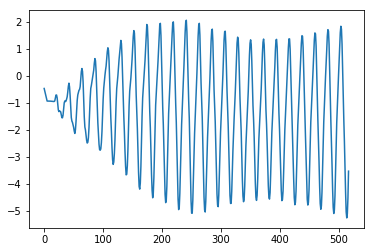

<Figure size 432x288 with 0 Axes>

In [191]:
ampl = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/125V', skiprows=2)
amplM = np.convolve(ampl[:,1], np.ones((10,))/10, mode='same')
plt.plot(amplM)
plt.show()
surfaceResonance = []
for v in noRampVids:
    plt.clf()
    n = 10
    ampl = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/%s' %v, skiprows=2)
    amplM = np.convolve(ampl[:,1], np.ones((n,))/n, mode='same')
    surfaceResonance.append([np.max(amplM)])
surfaceResonance = np.array(surfaceResonance)

# Quick Ramp

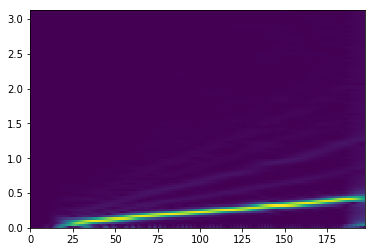

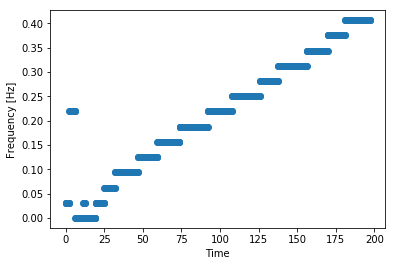

Text(0,0.5,'Frequency [Hz]')

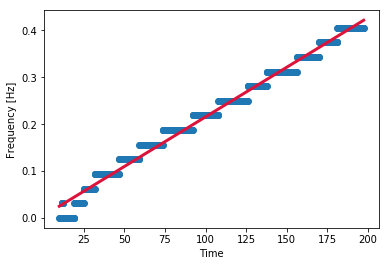

In [232]:
driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/driving/quickRamp', skiprows=2)
qsurface = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/quickRamp', skiprows=2)
fr = 1/(driving[1,0]-driving[0,0]) ##framerate
from scipy import signal

f, t, Zxx = signal.stft(driving[:,1], fr, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))
plt.show()
plt.plot(t, f[np.argmax(np.abs(Zxx), axis=0)], 'o')
frequencies = f[np.argmax(np.abs(Zxx), axis=0)]
plt.xlabel('Time')
plt.ylabel('Frequency [Hz]')

plt.show()
times_cut = t[np.logical_and(t<360, t>10)]
frequencies_cut = frequencies[np.logical_and(t<360, t>10)]
qpopt, qpcov = curve_fit(lin, times_cut, frequencies_cut)
plt.plot(times_cut, frequencies_cut, 'o')
plt.plot(times_cut, lin(times_cut, *qpopt), '-', linewidth = 3., c='Crimson')
plt.xlabel('Time')
plt.ylabel('Frequency [Hz]')

$$F(t)= (0.004 \pm 0.001) +  (0.00212 \pm 0.000007 )\cdot t$$


In [256]:
print(qpopt)
print(np.diag(np.sqrt(qpcov)))

[0.00212077 0.00351506]
[7.24685561e-06 8.47304262e-04]


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [243]:
qtFine = np.arange(0., len(rampQuick), 1)/29.18
qtFineFiltered = qtFine[np.logical_and(qtFine<170, qtFine>18)]
N = int(20*29.18)
qmovingAvgIF = np.convolve(rampQuick[:,0], np.ones((N,))/N, mode='same')
qmovingAvgIFw = np.convolve(rampQuick[:,1], np.ones((N,))/N, mode='same')
qmovingAvgsurface = np.convolve(rightsideQuick, np.ones((N,))/N, mode='same')


qmovingAvgIF_filt = qmovingAvgIF[np.logical_and(qtFine<170, qtFine>18)]
qmovingAvgIFw_filt = qmovingAvgIFw[np.logical_and(qtFine<170, qtFine>18)]
qmovingAvgsurface_filt = qmovingAvgsurface[np.logical_and(qtFine<170, qtFine>18)]



qsurfaceTracker = qsurface[np.logical_and(qsurface[:,0]<170, qsurface[:,0]>18)]
qmovingAvgsurfaceTracker = np.convolve(qsurfaceTracker[:,1], np.ones((100,))/100, mode='same')


<Figure size 432x288 with 0 Axes>

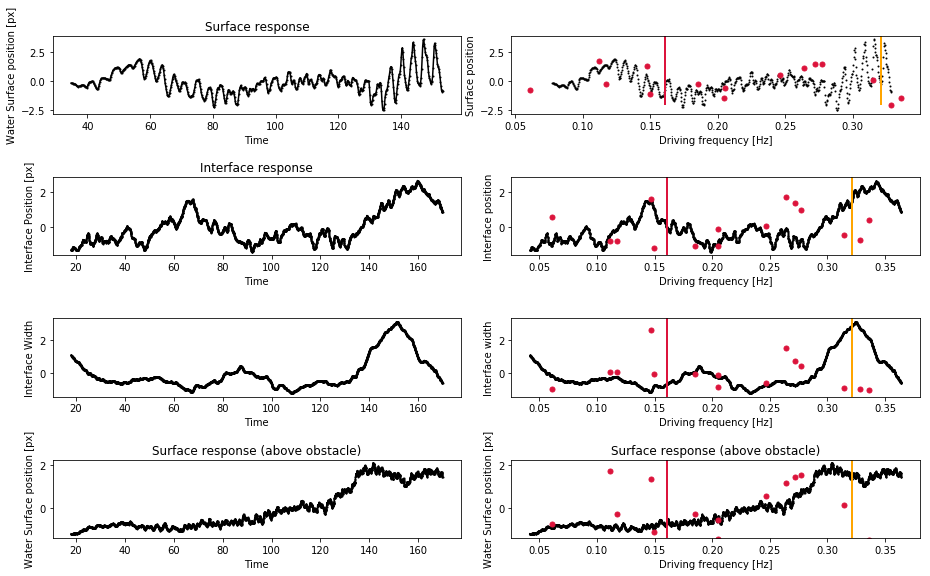

In [302]:
plt.clf()
f, axes = plt.subplots(4, 2)

axes[0][0].plot(qsurfaceTracker[:,0][100:-100], normalize(qmovingAvgsurfaceTracker[100:-100]), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(qtFineFiltered, normalize(qmovingAvgIF_filt),'-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(lin(qsurfaceTracker[:,0][100:-100], *qpopt),  normalize(qmovingAvgsurfaceTracker[100:-100]), 'o', markersize=1, c='black')
#axes[0][1].plot(frequencies, normalize(surfaceRes[:,1]), 'o', markersize=5, c='Crimson')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')
axes[0][1].plot(frozenFreqs, normalize(surfaceResonance), 'o', markersize=5, c='Crimson')

axes[0][1].set_ylim(axes[0][0].get_ylim())
axes[0][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[0][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')


axes[1][1].plot(lin(qtFineFiltered, *qpopt),  normalize(qmovingAvgIF_filt), 'o', markersize=1, c='black')
axes[1][1].plot(frozenFreqs, normalize(Resonance[:,0]), 'o', markersize=5, c='Crimson')

axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')

axes[1][1].set_ylim(axes[1][0].get_ylim())
axes[1][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[1][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')


axes[2][0].plot(qtFineFiltered, normalize(qmovingAvgIFw_filt),'-o', markersize=1, c='black')
axes[2][0].set_ylabel('Interface Width')
axes[2][0].set_xlabel('Time')

axes[2][1].plot(lin(qtFineFiltered, *qpopt),  normalize(qmovingAvgIFw_filt), 'o', markersize=1, c='black')
axes[2][1].plot(frozenFreqs, normalize(Resonance[:,1]), 'o', markersize=5, c='Crimson')
axes[2][1].set_ylim(axes[2][0].get_ylim())
axes[2][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[2][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')

axes[2][1].set_ylabel('Interface width')
axes[2][1].set_xlabel('Driving frequency [Hz]')

axes[3][0].plot(qtFineFiltered, normalize(qmovingAvgsurface_filt), '-o', markersize=1, c='black')
axes[3][0].set_xlabel('Time')
axes[3][0].set_ylabel('Water Surface position [px]')
axes[3][0].set_title('Surface response (above obstacle)')

axes[3][1].plot(lin(qtFineFiltered, *qpopt), normalize(qmovingAvgsurface_filt), '-o', markersize=1, c='black')
axes[3][1].plot(frozenFreqs, normalize(surfaceResonance), 'o', markersize=5, c='Crimson')
axes[3][1].set_ylim(axes[3][0].get_ylim())
axes[3][1].plot([TheorResonance, TheorResonance],[-2., 4.], '-', linewidth = 2., c='Crimson', label = r'$f_{res}$')
axes[3][1].plot([2*TheorResonance, 2*TheorResonance],[-2., 4.], '-', linewidth = 2., c='Orange', label = r'$2f_{res}$')

axes[3][1].set_xlabel('Driving frequency [Hz]')
axes[3][1].set_ylabel('Water Surface position [px]')
axes[3][1].set_title('Surface response (above obstacle)')

f.set_size_inches((13, 8))
f.tight_layout()

## Correlation of surface and interface response: 
### Slow Ramp, with tracker data

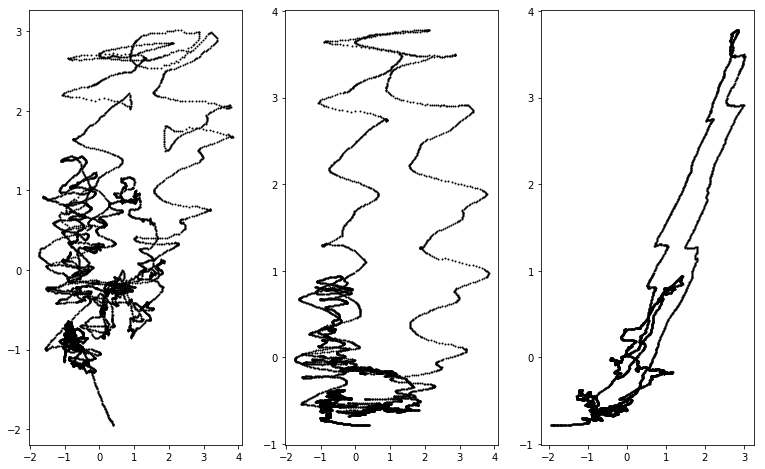

In [265]:
from scipy import interpolate
fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(13, 8))

surfaceInterpolate = interpolate.interp1d(surfaceTracker[:,0], normalize(movingAvgsurfaceTracker))
ax1.plot(surfaceInterpolate(tFineFiltered[100:-100]), normalize(movingAvgIF_filt[100:-100]), 'o', c='black', markersize=1.)
ax2.plot(surfaceInterpolate(tFineFiltered[100:-100]), normalize(movingAvgIFw_filt[100:-100]), 'o', c='black', markersize=1.)
ax3.plot(normalize(movingAvgIF_filt[100:-100]), normalize(movingAvgIFw_filt[100:-100]), 'o', c='black', markersize=1.)
plt.show()

### Slow ramp, with surface response above the obstacle

Text(0,0.5,'Interface Width')

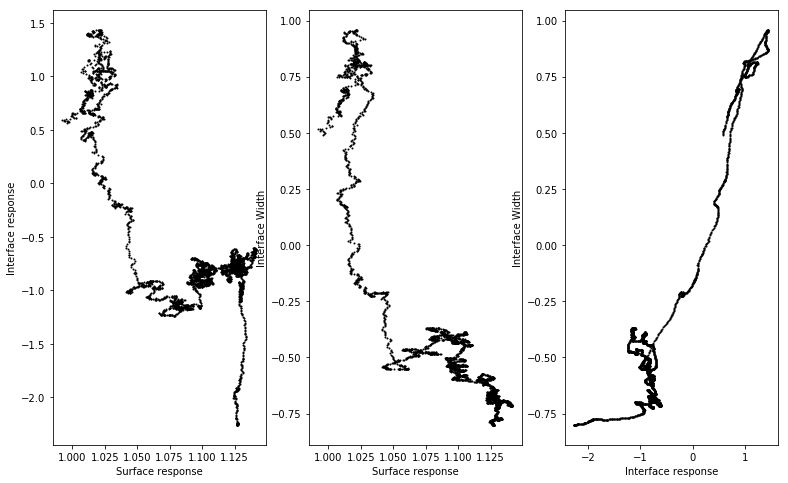

In [264]:
fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(13, 8))
ax1.plot( normalize(movingAvgsurface_filt)[:3800], normalize(movingAvgIF_filt)[:3800],'o', markersize=1., c='black')
ax1.set_xlabel('Surface response')
ax1.set_ylabel('Interface response')

ax2.plot(normalize(movingAvgsurface_filt)[:3800], normalize(movingAvgIFw_filt)[:3800], 'o', markersize=1., c='black')
ax2.set_xlabel('Surface response')
ax2.set_ylabel('Interface Width')


ax3.plot( normalize(movingAvgIF_filt)[:3800], normalize(movingAvgIFw_filt)[:3800], 'o',  markersize=1., c='black')
ax3.set_xlabel('Interface response')
ax3.set_ylabel('Interface Width')


### Quick Ramp, with interpolation


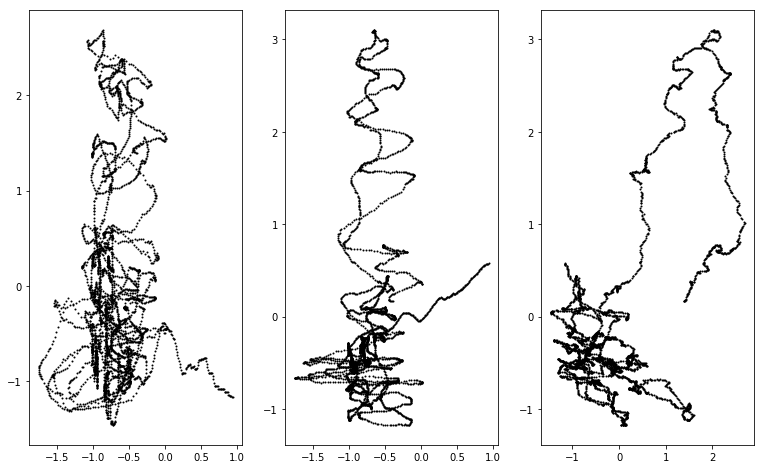

In [266]:
fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(13, 8))

qsurfaceInterpolate = interpolate.interp1d(qsurfaceTracker[:,0], normalize(qmovingAvgsurfaceTracker))
ax1.plot(surfaceInterpolate(qtFineFiltered[100:-100]), normalize(qmovingAvgIF_filt[100:-100]), 'o', c='black', markersize=1.)
ax2.plot(surfaceInterpolate(qtFineFiltered[100:-100]), normalize(qmovingAvgIFw_filt[100:-100]), 'o', c='black', markersize=1.)
ax3.plot(normalize(qmovingAvgIF_filt[100:-100]), normalize(qmovingAvgIFw_filt[100:-100]), 'o', c='black', markersize=1.)
plt.show()

### Quick ramp, with surface response above the obstacle

Text(0,0.5,'Interface Width')

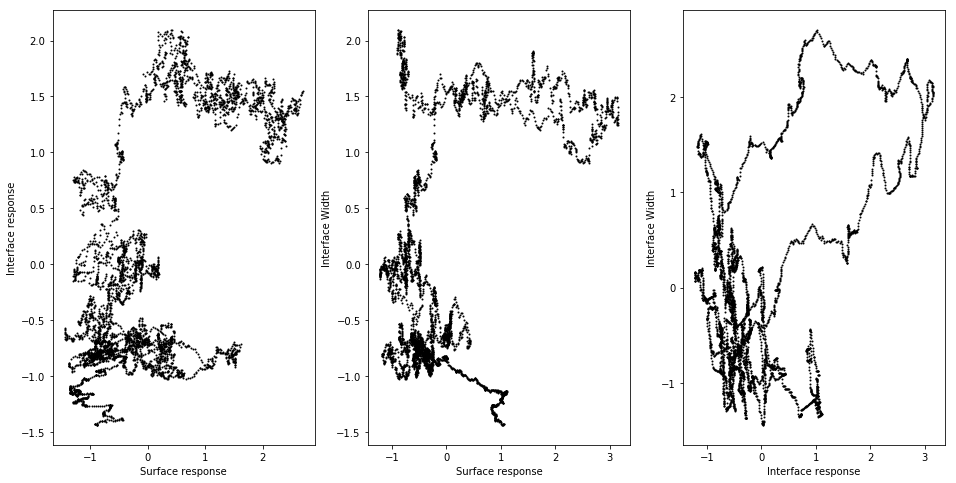

In [104]:
fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(16, 8))
ax1.plot(normalize(qmovingAvgIF), normalize(qmovingAvgsurface), 'o', markersize=1., c='black')
ax1.set_xlabel('Surface response')
ax1.set_ylabel('Interface response')

ax2.plot(normalize(qmovingAvgIFw), normalize(qmovingAvgsurface), 'o', markersize=1., c='black')
ax2.set_xlabel('Surface response')
ax2.set_ylabel('Interface Width')
ax3.plot(normalize(qmovingAvgIFw), normalize(qmovingAvgIF), 'o',  markersize=1., c='black')
ax3.set_xlabel('Interface response')
ax3.set_ylabel('Interface Width')


## Diagnostics

In [7]:
def plotFrame(ax, img, place, width, col):
    ax.imshow(img, cmap='Greys')
    #ax.set_ylim(0., len(img))
    #ax.set_xlim(150, 0)

    ax.plot([0,150],[place, place], '-', linewidth=5., c='Crimson')
    ax.plot([0,150],[place+width, place+width], '-', linewidth=5., c='Crimson')
    ax.plot([col,col],[0, len(img)], '-', linewidth=2., c='white')

def markXaxis(ax, Xpos):
    xmin, xmax = ax.get_xlim()
    xfrac = Xpos / (xmax-xmin)
    ax.annotate('', xy = (xfrac, 0), xytext=(xfrac, -0.1), xycoords = 'axes fraction', arrowprops=dict(facecolor='crimson', shrink=0.05))

In [91]:
import os
ls = os.listdir("quickRamp") # list
numberOfFiles = len(ls)
ref = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/reference/frame200.jpg" )
refc = ref[100:495, 650:800]

for i in np.arange(0, numberOfFiles, 100):
    img = read_file("quickRamp/frame%s.jpg" %(i))
    img = img[120:515, 650:800]
    plt.clf()
    fig, axes = plt.subplots(2, 2, figsize=(13, 8))
    cv2.equalizeHist(img)
    cv2.equalizeHist(refc)
    imgref = img[:,75]
    refref = refc[:,75]
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.4)
    peaks, _ = find_peaks(normalize(255.-refref), height=0.9)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff((peaksimgcut))))
    place = peaksimg[1:][maxplace]
    width = np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))

    axes[0,0].plot(peaksimg[1:], np.abs((np.diff(peaksimg))), "x")
    axes[0,0].plot(peaks[1:], np.abs((np.diff(peaks))), "o")
    axes[0,0].set_ylabel('Peak to peak distance')
    axes[0,0].set_xlabel('Vertical position')

    plotFrame(axes[0,1], img, place, width, 75)
    markXaxis(axes[0,0], place)

    f, t, Zxx = signal.stft(imgref, 1, nperseg=200,noverlap=199, detrend='constant')
    selectedFreq = np.abs(Zxx[maxplace])
    difference = (np.diff(np.abs((Zxx[maxplace]))))
    place2 = np.argmin(difference)
    width2 = np.abs(np.min(difference)) ## 
    plotFrame(axes[1,1], img, place2, width2, 75)
    axes[1,0].plot(np.abs(Zxx[maxplace]))
    axes[1,0].plot(np.abs(reference))

    #axes[1,0].plot(np.diff(np.abs((Zxx[maxplace]))))
    axes[1,0].set_ylabel('Amplitude of max. frequency')
    axes[1,0].set_xlabel('Vertical position')
    markXaxis(axes[1,0], place2)
    axes[0,0].set_title('Frame # %s' %i)
    fig.tight_layout()
    plt.savefig('diagnostics2/%05d.png' %i)
    plt.clf()
    plt.close()

<Figure size 432x288 with 0 Axes>

In [ ]:
img.shape

In [13]:
plt.close('all')

In [97]:

def printMaxAmpl(img, col, loc):
    img = img[0:250, loc[0]:loc[1]]
    cv2.equalizeHist(img)
    imgref = img[:,col]
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.3)

    return peaksimg[-1]

def measureInterface(src):
    ls = os.listdir(src) # list
    numberOfFiles = len(ls)
    ampls = []
    for i in range(numberOfFiles):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, 34, [1100,1135]))
    return np.array(ampls)



In [98]:
#rightside = measureInterface('rampSlow')
rightsideQuick = measureInterface('quickRamp')

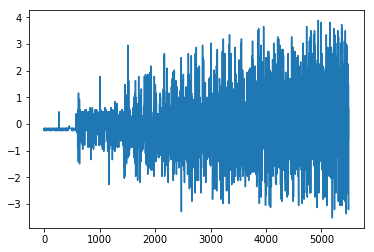

In [99]:
plt.plot(normalize(rightsideQuick))

### 2D FFT

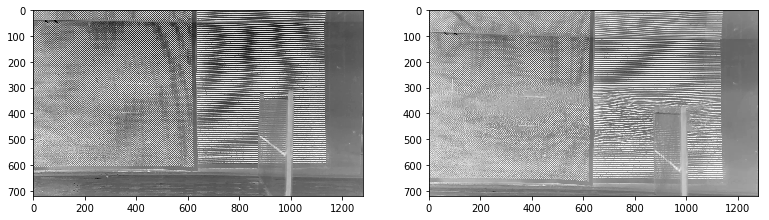

In [267]:
import numpy as np
import matplotlib.pyplot as plt

water = cv2.flip(cv2.imread("reference/frame200.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("rampSlow/frame4340.jpg", cv2.IMREAD_GRAYSCALE), -1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))

cv2.equalizeHist(water)
cv2.equalizeHist(img)
ax1.imshow(water, cmap='Greys')
ax2.imshow(img, cmap='Greys')
plt.show()



In [273]:
import openpiv.tools
import openpiv.process
import openpiv.scaling

window_size=16
overlap=8
dt=0.02
search_area_size=64

u, v, sig2noise = openpiv.process.extended_search_area_piv(water.astype(np.int32), 
                        img.astype(np.int32), window_size=window_size,  overlap=overlap,
                        dt=dt, search_area_size=search_area_size, sig2noise_method='peak2peak' )

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


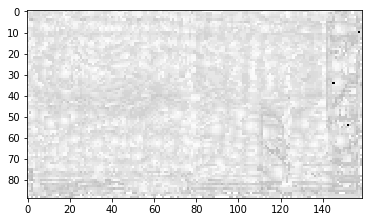

In [274]:
x, y = openpiv.process.get_coordinates( image_size=img.shape, window_size=8, overlap=4 )

plt.imshow(np.sqrt(u**2+v**2), cmap='Greys')